In [5]:
pip install numpy scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Coverage Probability for Pivot 1: 0.98
Coverage Probability for Pivot 2: 0.98
Coverage Probability for Pivot 3: 1.00


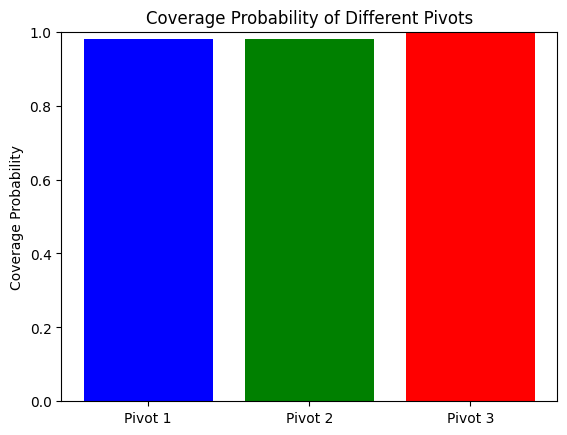

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
mu_0 = 0  # Known mean
sigma_true = 2  # True standard deviation (so variance is 4)
n = 100  # Sample size
alpha = 0.05  # Significance level for 95% confidence interval
num_simulations = 50  # Number of simulations

# Function to calculate pivots and confidence intervals
def confidence_intervals(X, n, alpha, sigma_true):
    # Sample variance (MLE estimator)
    sigma_hat_sq = np.var(X, ddof=0)
    
    # Unbiased estimator
    S_sq = np.var(X, ddof=1)
    
    # Pivot 1 (most common pivot)
    chi2_low_1 = stats.chi2.ppf(alpha / 2, n - 1)
    chi2_high_1 = stats.chi2.ppf(1 - alpha / 2, n - 1)
    ci_1 = ((n - 1) * sigma_hat_sq / chi2_high_1, (n - 1) * sigma_hat_sq / chi2_low_1)
    
    # Pivot 2 (scaled estimator)
    chi2_low_2 = stats.chi2.ppf(alpha / 2, n)
    chi2_high_2 = stats.chi2.ppf(1 - alpha / 2, n)
    ci_2 = (n * sigma_hat_sq / chi2_high_2, n * sigma_hat_sq / chi2_low_2)
    
    # Pivot 3 (using unbiased estimator)
    chi2_low_3 = stats.chi2.ppf(alpha / 2, n - 1)
    chi2_high_3 = stats.chi2.ppf(1 - alpha / 2, n - 1)
    ci_3 = ((n - 1) * S_sq / chi2_high_3, (n - 1) * S_sq / chi2_low_3)
    
    return ci_1, ci_2, ci_3

# Simulate the data and compare the performance of pivots
np.random.seed(42)
coverage_pivot1 = 0
coverage_pivot2 = 0
coverage_pivot3 = 0

for _ in range(num_simulations):
    # Simulate random sample from N(mu_0, sigma_true^2)
    X = np.random.normal(mu_0, sigma_true, n)
    
    # Get the confidence intervals for the three pivots
    ci_1, ci_2, ci_3 = confidence_intervals(X, n, alpha, sigma_true)
    
    # Check if true variance (sigma_true^2 = 4) lies within each interval
    if ci_1[0] <= sigma_true**2 <= ci_1[1]:
        coverage_pivot1 += 1
    if ci_2[0] <= sigma_true**2 <= ci_2[1]:
        coverage_pivot2 += 1
    if ci_3[0] <= sigma_true**2 <= ci_3[1]:
        coverage_pivot3 += 1

# Calculate coverage probability for each pivot
coverage_prob_pivot1 = coverage_pivot1 / num_simulations
coverage_prob_pivot2 = coverage_pivot2 / num_simulations
coverage_prob_pivot3 = coverage_pivot3 / num_simulations

# Display results
print(f"Coverage Probability for Pivot 1: {coverage_prob_pivot1:.2f}")
print(f"Coverage Probability for Pivot 2: {coverage_prob_pivot2:.2f}")
print(f"Coverage Probability for Pivot 3: {coverage_prob_pivot3:.2f}")

# Optional: Visualize the confidence intervals
labels = ['Pivot 1', 'Pivot 2', 'Pivot 3']
coverage_probs = [coverage_prob_pivot1, coverage_prob_pivot2, coverage_prob_pivot3]

plt.bar(labels, coverage_probs, color=['blue', 'green', 'red'])
plt.ylabel('Coverage Probability')
plt.title('Coverage Probability of Different Pivots')
plt.ylim(0, 1)
plt.show()


In [7]:
# Step 1: Define Parameters
mu_0 = 0          # Mean (mu_0) of the normal distribution
sigma_true = 2    # Standard deviation (sigma) of the normal distribution (so variance = 4)
n = 100           # Sample size

# Step 2: Simulate a random sample of size n from N(mu_0, sigma^2)
sample = np.random.normal(mu_0, sigma_true, n)

# Step 3: Print the generated sample
print("Simulated random sample from N(0, 4):")
print(sample)

Simulated random sample from N(0, 4):
[-0.84751936 -0.90682822 -3.59128635 -0.66018038  1.46565816 -2.54846424
  2.0969653   0.97554964 -1.46846664 -0.28305927  3.19664362  1.46709563
  0.01756731 -0.47536663  0.15321814 -1.02352712 -4.20949901  4.08435582
  0.31065     0.79629453 -0.1158155  -1.4702336  -0.37184896 -3.19878952
  4.554173   -2.469024   -2.06393257 -0.88051841  2.57615145  0.029018
 -2.47227159  2.50867672  1.46200125  1.07686991  1.43146848  4.7887238
  4.37018979 -1.37343069  3.24776999  0.76633638  0.99819163 -3.38454166
 -0.34077153 -1.62564718  1.65611763  2.142161   -4.1489727  -0.04406973
  2.24372301 -0.37335792  1.45812729  0.70233094  0.68332046 -0.54262996
 -2.43316161 -2.24306029  1.41870503  0.03891651 -0.27702449 -0.84778008
 -0.61037769  2.09382359 -0.67048816 -2.68212943  1.48730355 -0.40975333
  0.06279173  3.21515661 -0.04112111  0.57836735 -2.35784698 -0.4393389
  1.21905209 -3.11074747  0.40169019  0.20158215  0.08257491  2.0743178
  0.66887703  2.95

In [8]:
import numpy as np
import scipy.stats as stats

# Provided sample data
sample = np.array([-0.84751936, -0.90682822, -3.59128635, -0.66018038, 1.46565816, -2.54846424,
                   2.0969653, 0.97554964, -1.46846664, -0.28305927, 3.19664362, 1.46709563,
                   0.01756731, -0.47536663, 0.15321814, -1.02352712, -4.20949901, 4.08435582,
                   0.31065, 0.79629453, -0.1158155, -1.4702336, -0.37184896, -3.19878952,
                   4.554173, -2.469024, -2.06393257, -0.88051841, 2.57615145, 0.029018,
                   -2.47227159, 2.50867672, 1.46200125, 1.07686991, 1.43146848, 4.7887238,
                   4.37018979, -1.37343069, 3.24776999, 0.76633638, 0.99819163, -3.38454166,
                   -0.34077153, -1.62564718, 1.65611763, 2.142161, -4.1489727, -0.04406973,
                   2.24372301, -0.37335792, 1.45812729, 0.70233094, 0.68332046, -0.54262996,
                   -2.43316161, -2.24306029, 1.41870503, 0.03891651, -0.27702449, -0.84778008,
                   -0.61037769, 2.09382359, -0.67048816, -2.68212943, 1.48730355, -0.40975333,
                   0.06279173, 3.21515661, -0.04112111, 0.57836735, -2.35784698, -0.4393389,
                   1.21905209, -3.11074747, 0.40169019, 0.20158215, 0.08257491, 2.0743178,
                   0.66887703, 2.9561438, -1.98717903, 0.27184913, 0.16893357, -2.13850899,
                   1.91259, 4.64934661, -0.03401215, 1.01004218, 0.16903695, -1.42716934,
                   -3.64152056, -1.41154697, -2.78391676, 3.40820416, -0.23021939, -0.69183866,
                   1.77830765, -2.24350221, -1.53372808, 0.13614454])

# Sample size and significance level
n = len(sample)
alpha = 0.05

# Function to calculate confidence intervals for three different pivots
def confidence_intervals(sample, n, alpha):
    # Sample variance (MLE estimator)
    sigma_hat_sq = np.var(sample, ddof=0)  # ddof=0 for MLE (biased estimator)
    
    # Unbiased estimator of variance
    S_sq = np.var(sample, ddof=1)  # ddof=1 for unbiased estimator
    
    # Pivot 1 (most common pivot)
    chi2_low_1 = stats.chi2.ppf(alpha / 2, n - 1)
    chi2_high_1 = stats.chi2.ppf(1 - alpha / 2, n - 1)
    ci_1 = ((n - 1) * sigma_hat_sq / chi2_high_1, (n - 1) * sigma_hat_sq / chi2_low_1)
    
    # Pivot 2 (scaled estimator)
    chi2_low_2 = stats.chi2.ppf(alpha / 2, n)
    chi2_high_2 = stats.chi2.ppf(1 - alpha / 2, n)
    ci_2 = (n * sigma_hat_sq / chi2_high_2, n * sigma_hat_sq / chi2_low_2)
    
    # Pivot 3 (using unbiased estimator)
    chi2_low_3 = stats.chi2.ppf(alpha / 2, n - 1)
    chi2_high_3 = stats.chi2.ppf(1 - alpha / 2, n - 1)
    ci_3 = ((n - 1) * S_sq / chi2_high_3, (n - 1) * S_sq / chi2_low_3)
    
    return ci_1, ci_2, ci_3

# Step 3: Compute the confidence intervals for the provided sample
ci_1, ci_2, ci_3 = confidence_intervals(sample, n, alpha)

# Step 4: Display the results
print("Confidence Interval for Pivot 1:", ci_1)
print("Confidence Interval for Pivot 2:", ci_2)
print("Confidence Interval for Pivot 3:", ci_3)


Confidence Interval for Pivot 1: (np.float64(3.1162159501969082), np.float64(5.455081200065122))
Confidence Interval for Pivot 2: (np.float64(3.1200157758632288), np.float64(5.446274341179148))
Confidence Interval for Pivot 3: (np.float64(3.1476928789867764), np.float64(5.51018303036881))


Coverage Probability for Pivot 1: 0.98
Coverage Probability for Pivot 2: 0.98
Coverage Probability for Pivot 3: 1.00


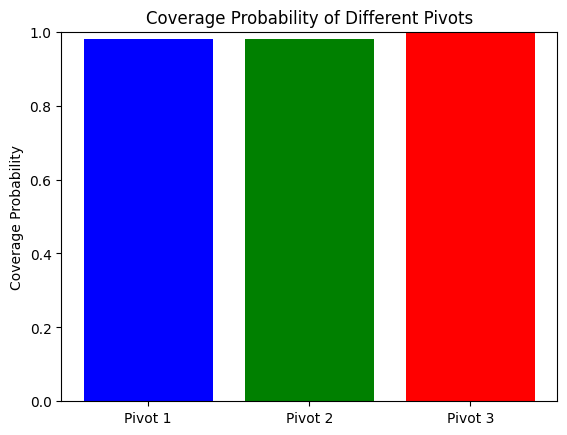

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
mu_0 = 0  # Known mean
sigma_true = 2  # True standard deviation (so variance is 4)
n = 100  # Sample size
alpha = 0.05  # Significance level for 95% confidence interval
num_simulations = 50  # Number of simulations

# Function to calculate confidence intervals
def confidence_intervals(sample, n, alpha):
    # Sample variance (MLE estimator)
    sigma_hat_sq = np.var(sample, ddof=0)  # ddof=0 for biased estimator (MLE)
    
    # Unbiased estimator of variance
    S_sq = np.var(sample, ddof=1)  # ddof=1 for unbiased estimator
    
    # Pivot 1 (most common pivot)
    chi2_low_1 = stats.chi2.ppf(alpha / 2, n - 1)
    chi2_high_1 = stats.chi2.ppf(1 - alpha / 2, n - 1)
    ci_1 = ((n - 1) * sigma_hat_sq / chi2_high_1, (n - 1) * sigma_hat_sq / chi2_low_1)
    
    # Pivot 2 (scaled estimator)
    chi2_low_2 = stats.chi2.ppf(alpha / 2, n)
    chi2_high_2 = stats.chi2.ppf(1 - alpha / 2, n)
    ci_2 = (n * sigma_hat_sq / chi2_high_2, n * sigma_hat_sq / chi2_low_2)
    
    # Pivot 3 (using unbiased estimator)
    chi2_low_3 = stats.chi2.ppf(alpha / 2, n - 1)
    chi2_high_3 = stats.chi2.ppf(1 - alpha / 2, n - 1)
    ci_3 = ((n - 1) * S_sq / chi2_high_3, (n - 1) * S_sq / chi2_low_3)
    
    return ci_1, ci_2, ci_3

# Simulate the data and compare the performance of pivots
np.random.seed(42)
coverage_pivot1 = 0
coverage_pivot2 = 0
coverage_pivot3 = 0

for _ in range(num_simulations):
    # Simulate random sample from N(mu_0, sigma_true^2)
    X = np.random.normal(mu_0, sigma_true, n)
    
    # Get the confidence intervals for the three pivots
    ci_1, ci_2, ci_3 = confidence_intervals(X, n, alpha)
    
    # Check if true variance (sigma_true^2 = 4) lies within each interval
    if ci_1[0] <= sigma_true**2 <= ci_1[1]:
        coverage_pivot1 += 1
    if ci_2[0] <= sigma_true**2 <= ci_2[1]:
        coverage_pivot2 += 1
    if ci_3[0] <= sigma_true**2 <= ci_3[1]:
        coverage_pivot3 += 1

# Calculate coverage probability for each pivot
coverage_prob_pivot1 = coverage_pivot1 / num_simulations
coverage_prob_pivot2 = coverage_pivot2 / num_simulations
coverage_prob_pivot3 = coverage_pivot3 / num_simulations

# Display results
print(f"Coverage Probability for Pivot 1: {coverage_prob_pivot1:.2f}")
print(f"Coverage Probability for Pivot 2: {coverage_prob_pivot2:.2f}")
print(f"Coverage Probability for Pivot 3: {coverage_prob_pivot3:.2f}")

# Optional: Visualize the coverage probability
labels = ['Pivot 1', 'Pivot 2', 'Pivot 3']
coverage_probs = [coverage_prob_pivot1, coverage_prob_pivot2, coverage_prob_pivot3]

plt.bar(labels, coverage_probs, color=['blue', 'green', 'red'])
plt.ylabel('Coverage Probability')
plt.title('Coverage Probability of Different Pivots')
plt.ylim(0, 1)
plt.show()
